In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")

# Value-based Segmentation

In [3]:
columns = ["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]
X = df.copy()[columns]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

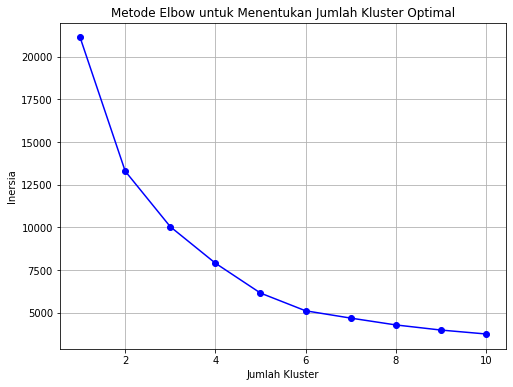

In [4]:
# Hitung inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
k_values = range(1, 11)  # Coba dari 1 hingga 10 kluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method untuk menentukan jumlah kluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.grid()
plt.show()

In [5]:
# Inisialisasi model K-Means dengan jumlah kluster yang berbeda (misalnya, 2 hingga 5)
k_values = range(2, 11)
best_score = -1
best_k = 0

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_scaled)
    
    # Prediksi kluster untuk setiap data poin
    labels = kmeans.labels_
    
    # Hitung Silhouette Score untuk evaluasi
    score = silhouette_score(X_scaled, labels)
    
    # Cek jika nilai Silhouette Score lebih baik daripada sebelumnya
    if score > best_score:
        best_score = score
        best_k = k

# Setel model K-Means dengan jumlah kluster terbaik
best_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init="auto")
best_kmeans.fit(X_scaled)

# Tambahkan label kluster ke dataset
df['Cluster'] = best_kmeans.labels_

# Output hasil
print("Jumlah Kluster Terbaik:", best_k)
print("Silhouette Score Terbaik:", best_score)

Jumlah Kluster Terbaik: 5
Silhouette Score Terbaik: 0.35569619793150703


In [6]:
X["Cluster"] = list(best_kmeans.labels_)

In [7]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', random_state=42).fit_transform(X)
X_embedded.shape

(7043, 2)

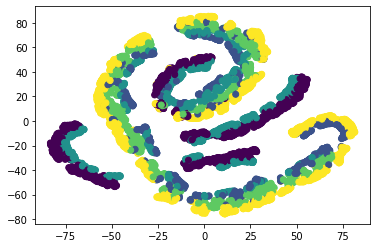

In [8]:
plt.scatter(x=X_embedded[:, 0], y=X_embedded[:,1], c=X["Cluster"]);

### Coba pakai dbscan

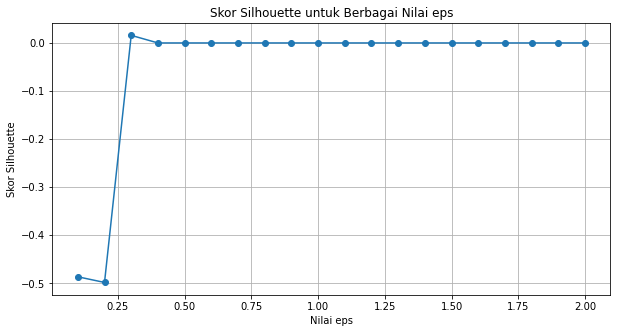

Nilai eps terbaik adalah: 0.3


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Buat data dummy untuk demonstrasi
# data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns])

# Kumpulan nilai `eps` yang akan diuji
eps_values = np.linspace(0.1, 2.0, num=20)

# Inisialisasi list untuk menyimpan skor Silhouette untuk setiap nilai `eps`
silhouette_scores = []

for eps in eps_values:
    # Membuat objek DBSCAN dengan nilai `eps` tertentu
    dbscan = DBSCAN(eps=eps, min_samples=5)
    
    # Melakukan clustering
    labels = dbscan.fit_predict(X_scaled)
    
    if len(pd.Series(labels).unique()) > 1:
        # Menghitung skor Silhouette
        silhouette_avg = silhouette_score(X_scaled, labels)
        
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)


# Menampilkan plot skor Silhouette untuk setiap nilai `eps`
plt.figure(figsize=(10, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Skor Silhouette untuk Berbagai Nilai eps')
plt.xlabel('Nilai eps')
plt.ylabel('Skor Silhouette')
plt.grid(True)
plt.show()

# Pilih nilai `eps` dengan skor Silhouette tertinggi
best_eps = eps_values[np.argmax(silhouette_scores)]
print(f"Nilai eps terbaik adalah: {best_eps}")


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns])

In [11]:
from sklearn.cluster import HDBSCAN

dbscan = HDBSCAN()
labels = dbscan.fit_predict(X_scaled)
pd.Series(labels).unique()

ImportError: cannot import name 'HDBSCAN' from 'sklearn.cluster' (c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\__init__.py)

In [ ]:
from sklearn.cluster import HDBSCAN
from sklearn.datasets import load_digits
X, _ = load_digits(return_X_y=True)
hdb = HDBSCAN(min_cluster_size=20)
hdb.fit(X)
hdb.labels_

ImportError: cannot import name 'HDBSCAN' from 'sklearn.cluster' (c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\__init__.py)

### Clustering hasil reduksi

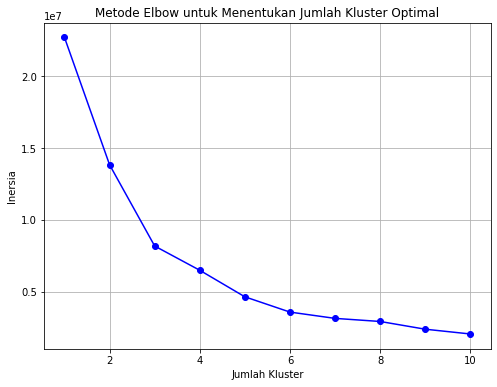

In [13]:
# Hitung inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
k_values = range(1, 11)  # Coba dari 1 hingga 10 kluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_embedded)
    inertia.append(kmeans.inertia_)

# Plot elbow method untuk menentukan jumlah kluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.grid()
plt.show()

In [14]:
# Inisialisasi model K-Means dengan jumlah kluster yang berbeda (misalnya, 2 hingga 5)
k_values = range(2, 11)
best_score = -1
best_k = 0

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_embedded)
    
    # Prediksi kluster untuk setiap data poin
    labels = kmeans.labels_
    
    # Hitung Silhouette Score untuk evaluasi
    score = silhouette_score(X_embedded, labels)
    
    # Cek jika nilai Silhouette Score lebih baik daripada sebelumnya
    if score > best_score:
        best_score = score
        best_k = k

# Setel model K-Means dengan jumlah kluster terbaik
best_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init="auto")
best_kmeans.fit(X_embedded)

# Tambahkan label kluster ke dataset
df['Cluster'] = best_kmeans.labels_

# Output hasil
print("Jumlah Kluster Terbaik:", best_k)
print("Silhouette Score Terbaik:", best_score)

Jumlah Kluster Terbaik: 6
Silhouette Score Terbaik: 0.42016706


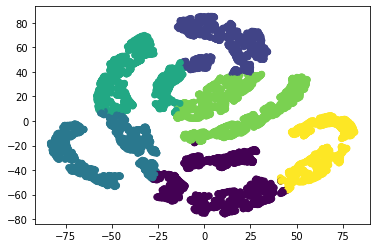

In [18]:
best_kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
best_kmeans.fit(X_embedded)


plt.scatter(x=X_embedded[:, 0], y=X_embedded[:,1], c=best_kmeans.labels_);

### DBSCAN tapi reduksi

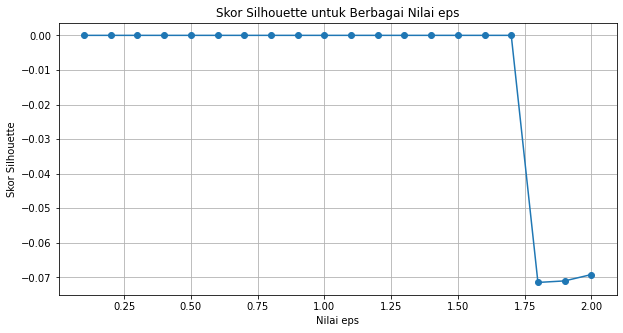

Nilai eps terbaik adalah: 0.1


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Buat data dummy untuk demonstrasi
# data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X[columns])

# Kumpulan nilai `eps` yang akan diuji
eps_values = np.linspace(0.1, 2.0, num=20)

# Inisialisasi list untuk menyimpan skor Silhouette untuk setiap nilai `eps`
silhouette_scores = []

for eps in eps_values:
    # Membuat objek DBSCAN dengan nilai `eps` tertentu
    dbscan = DBSCAN(eps=eps, min_samples=30)
    
    # Melakukan clustering
    labels = dbscan.fit_predict(X_embedded)
    
    if len(pd.Series(labels).unique()) > 1:
        # Menghitung skor Silhouette
        silhouette_avg = silhouette_score(X_embedded, labels)
        
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)


# Menampilkan plot skor Silhouette untuk setiap nilai `eps`
plt.figure(figsize=(10, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Skor Silhouette untuk Berbagai Nilai eps')
plt.xlabel('Nilai eps')
plt.ylabel('Skor Silhouette')
plt.grid(True)
plt.show()

# Pilih nilai `eps` dengan skor Silhouette tertinggi
best_eps = eps_values[np.argmax(silhouette_scores)]
print(f"Nilai eps terbaik adalah: {best_eps}")


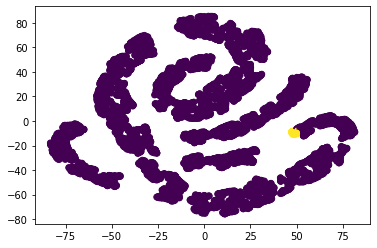

In [34]:
dbscan = DBSCAN(eps=2, min_samples=30)
labels = dbscan.fit_predict(X_embedded)

plt.scatter(x=X_embedded[:, 0], y=X_embedded[:,1], c=labels);

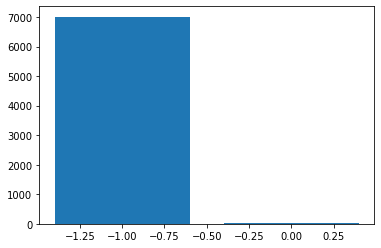

In [35]:
temp = pd.Series(labels).value_counts().reset_index()
plt.bar(x=temp["index"], height=temp[0]);